https://www.kaggle.com/ancientaxe/simple-neural-network-from-scratch-in-python

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns # visualization
from matplotlib import pyplot as plt

import sys
sys.path.append("..")
from Functions.UNSW_DF import *
x_train, x_test, y_train, y_test = DF_XY()

( 1 ) Reading Preprocessed CSV files..
	 Training dataset loaded..
	 Testing dataset loaded..

( 2 ) Loading done, splitting into X and Y..
	 ( 2.1 ) x_train Shape:  	 (175341, 53)
	 ( 2.2 ) y_train Shape:  	 (175341,)
	 ( 2.3 ) x_test Shape:  	 (82332, 53)
	 ( 2.4 ) y_test Shape:  	 (82332,)
( 3 ) Done!
PS! Import with: x_train, x_test, y_train, y_test = XY_import()


In [3]:
X = np.array(x_train[0:1000])
y = np.array(y_train[0:1000])

In [4]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) -1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594],
       [-0.12770671,  0.89795461,  0.57261197,  0.7325786 , -0.65366916],
       [-0.85010283,  0.20148544, -0.66405563,  0.46676034, -0.18311228],
       [ 0.05581765,  0.87514317,  0.04339224, -0.78361323, -0.68355319],
       [ 0.0904053 ,  0.04880816,  0.27522049, -0.19700911,  0.29961022],
       [-0.20619999,  0.24783223,  0.53480993, -0.64205218, -0.24884846],
       [ 0.00506612,  0.37333416, -0.4926407 ,  0.10948173,  0.24986169],
       [ 0.79100233, -0.27429282,  0.27511415, -0.6171072 , -0.00441177],
       [-0.63510919,  0.83676608, -0.13635586,  0.6603762 , -0.16644739],
       [ 0.80933518, -0.19034957, -0.33765099,  0.14427754,  0.6908873 ],
       [ 0.72202862,  0.19137623, -0.8

In [5]:
num_outputs = 1
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.10928591],
       [ 0.6841133 ],
       [-0.60188869],
       [-0.11880191],
       [ 0.33490907]])

In [6]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

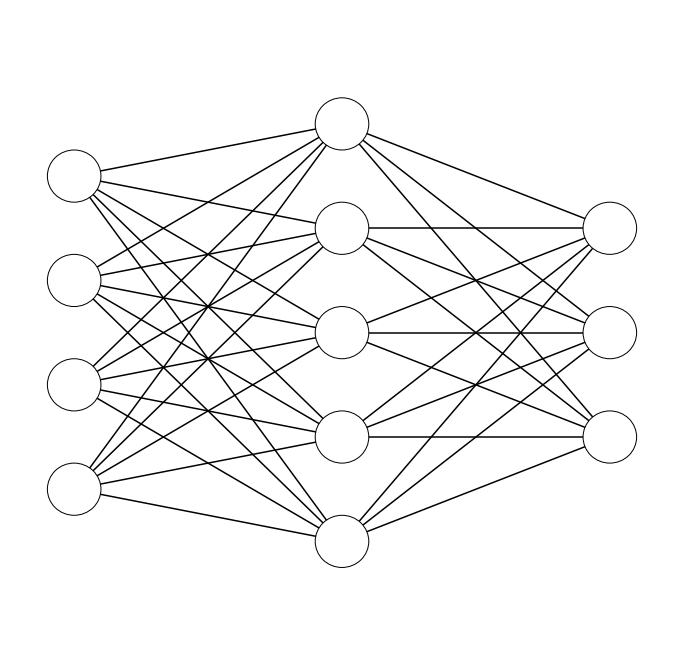

In [7]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

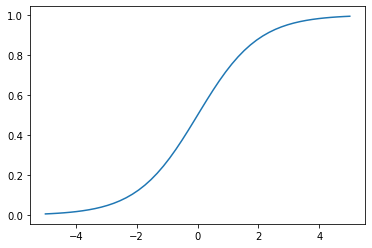

In [8]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [9]:
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use use square as well
    er = (abs(y - l2)).mean()
    error.append(er)

    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate

    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # update weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate

print('Error:', er)

ValueError: non-broadcastable output operand with shape (5,1) doesn't match the broadcast shape (5,1000)